# Cleaning the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import csv
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
data = pd.read_csv("TripAdvisor_English_Reviews_Seoul_Hotels.csv")
print(data.shape)
data.head()

(50178, 7)


,Hotel,Title,Date,Reviewer,Location,Rating,Review
0,9Brick_Hotel,Love the look,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Location not too bad. Near the Hongik station....
1,9Brick_Hotel,Very bad experience,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,I asked the hotel to provide another set of co...
2,9Brick_Hotel,Chic design,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,A clean boutique hotel conveniently located wi...
3,9Brick_Hotel,Great location but weak service standards,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Let me start with what I like about the hotel....
4,9Brick_Hotel,Never better,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,This hotel exceeded my expectations in terms o...


#### Combine Title and Reviews Columns

In [3]:
data["Review_cmplt"] = data["Title"]+" "+ data["Review"]
data.drop(["Title","Review"], axis = 1, inplace = True)
data.head()

,Hotel,Date,Reviewer,Location,Rating,Review_cmplt
0,9Brick_Hotel,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Great location but weak service standards Let ...
4,9Brick_Hotel,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,Never better This hotel exceeded my expectatio...


#### Checking for null values 

In [4]:
data.isna().sum()

Hotel              0
Date              90
Reviewer           0
Location        9189
Rating             0
Review_cmplt       3
dtype: int64

In [5]:
#Since dropping a small number will not affect the dataset, I will drop the rows with null values for Review_complt column.

#will deal with Location and Date column later

data.dropna(subset=['Review_cmplt'],inplace = True)
data.isna().sum()

Hotel              0
Date              90
Reviewer           0
Location        9188
Rating             0
Review_cmplt       0
dtype: int64

#### Cleaning Data:

1. In the Date column, remove "Date of stay"
2. Keep only English words in Review_complt column
3. Keep only name of the reviewer
4. Make a column for the date of the review written
5. Keep only the country name in the location column
6. Get the ratings out of 5

In [6]:
# Defining functions to clean the data

def clean_date(text):
    try:
        return re.sub(r'Date of stay:', "",text).strip()
    except:
        return None

def clean_reviews(text):
    """
    This will remove only the non english characters and not anything else including punctuation marks.
    Punctuation marks and capital letter play an important role in Sentiment Analysis.
    """
    text = re.sub("[^A-Za-z0-9|\(\)\,\!\[\]\'\"\.\-\{\}\?]+", " ", text)
    return text.strip()

def get_name(text):
    #gets only the name from the Reviewer column
    return text.split("wrote ")[0].strip()


def generate_date(text):
    #gets the date when the review was written from Reviewer column
    return text.split("wrote a review")[1].strip()

def get_country(text):
    
    if text is not None:
        try:
            return text.split(",")[1].strip()
        except:
            return text #ceratin locations have only country
    
def get_rating(rating):
    return rating/10 

In [7]:
clean_date("Date of stay: February 2020")

'February 2020'

In [8]:
data["Review_cmplt"][1067]

'位置方便，但房間有點暗 位置方便，弘大又是機場線，來回機場也非常方便。不好的是房間燈不太夠，一直覺得很暗。地方很夠，二個大行李都可以放得下！very nice room！location is also very good! Shopping,eating,everything nearby hotel, within 10minutes ! Will be come and stay at this hotel again.'

In [9]:
clean_reviews(data["Review_cmplt"][1067])

'very nice room location is also very good! Shopping,eating,everything nearby hotel, within 10minutes ! Will be come and stay at this hotel again.'

In [10]:
# Applying the functions to our dataset

data["reviewer_name"]= data["Reviewer"].apply(get_name)
data["country"]= data["Location"].apply(get_country)
data["rating"]= data["Rating"].apply(get_rating)
data["date_of_stay"] = data["Date"].apply(clean_date)
data["date_review_written"]= data["Reviewer"].apply(generate_date)
data["clean_reviews"] = data["Review_cmplt"].apply(clean_reviews)
data.head()

,Hotel,Date,Reviewer,Location,Rating,Review_cmplt,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews
0,9Brick_Hotel,Date of stay: December 2022,ChristelleNg wrote a review Jan 2023,"Singapore, Singapore",40,Love the look Location not too bad. Near the H...,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Date of stay: December 2022,Molly123 wrote a review Dec 2022,NaN,10,Very bad experience I asked the hotel to provi...,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,Date of stay: October 2019,wamysdottir wrote a review Apr 2020,"Copenhagen, Denmark",40,Chic design A clean boutique hotel convenientl...,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,Date of stay: December 2019,worldtraveller wrote a review Dec 2019,NaN,30,Great location but weak service standards Let ...,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...
4,9Brick_Hotel,Date of stay: November 2019,Hui Yingg wrote a review Nov 2019,"Sydney, Australia",40,Never better This hotel exceeded my expectatio...,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...


In [11]:
data.drop(["Date","Reviewer","Location","Rating","Review_cmplt"], axis = 1, inplace = True)
print(data.shape)
data.head()

(50175, 7)


,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...
3,9Brick_Hotel,worldtraveller,NaN,3.0,December 2019,Dec 2019,Great location but weak service standards Let ...
4,9Brick_Hotel,Hui Yingg,Australia,4.0,November 2019,Nov 2019,Never better This hotel exceeded my expectatio...


In [12]:
# saving this data
data.to_csv("Clean_TripAdvisor_English_Reviews_Seoul_Hotels.csv", index = False)

In [13]:
data.isna().sum()

Hotel                     0
reviewer_name             0
country                9188
rating                    0
date_of_stay             90
date_review_written       0
clean_reviews             0
dtype: int64

# EDA

### Plotting the Number of Yearly Reviews

In [14]:
#defining a function to get only the year from the given date

def get_years(text):
    text = re.sub("[^0-9]+", "",text)
    return text.strip()

#applying the function to our dataset

data["year"] = data["date_review_written"].apply(get_years)

data.head(3)

,Hotel,reviewer_name,country,rating,date_of_stay,date_review_written,clean_reviews,year
0,9Brick_Hotel,ChristelleNg,Singapore,4.0,December 2022,Jan 2023,Love the look Location not too bad. Near the H...,2023
1,9Brick_Hotel,Molly123,NaN,1.0,December 2022,Dec 2022,Very bad experience I asked the hotel to provi...,2022
2,9Brick_Hotel,wamysdottir,Denmark,4.0,October 2019,Apr 2020,Chic design A clean boutique hotel convenientl...,2020


In [15]:
yearly_reviews = pd.DataFrame(data["year"].value_counts()).sort_index()
yearly_reviews.columns = ['num_reviews']
yearly_reviews

,num_reviews
,9
1,6
2,5
2004,9
2005,46
2006,68
2007,131
2008,214
2009,504
2010,541


#### Note: Through EDA, it is known that the number of reviews above corresponding to  year 1,2,3,4, and no values are the reviews corresponding to year 2023. Since recent reviews (as of the date of scraping) had dates as "Yesterday"  etc. Thus we will merge all these reviews under 2023

In [16]:
yearly_reviews.loc["2023"] = [383]
yearly_reviews.drop(["1",'2','3','4',],axis = 0,inplace = True)
yearly_reviews.drop(index=yearly_reviews.index[0], axis=0, inplace=True)
yearly_reviews.reset_index(inplace=True)
yearly_reviews = yearly_reviews.rename(columns = {'index':'year'})
yearly_reviews

,year,num_reviews
0,2004,9
1,2005,46
2,2006,68
3,2007,131
4,2008,214
5,2009,504
6,2010,541
7,2011,1118
8,2012,2062
9,2013,3292


In [17]:
# for the sake of the plot, we will drop the year 2023 as well as the year has just started.
yearly_reviews.drop(index=yearly_reviews.index[-1], axis=0, inplace=True)
yearly_reviews

,year,num_reviews
0,2004,9
1,2005,46
2,2006,68
3,2007,131
4,2008,214
5,2009,504
6,2010,541
7,2011,1118
8,2012,2062
9,2013,3292


<Figure size 1440x720 with 0 Axes>

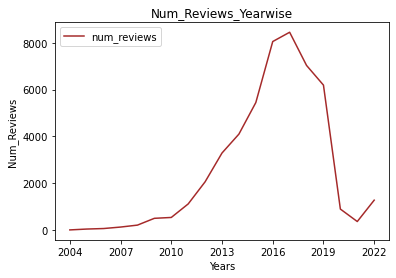

In [18]:
fig = plt.figure(figsize=(20,10))
yearly_reviews.plot(color="brown")
plt.title('Num_Reviews_Yearwise')
plt.xlabel("Years",)
plt.ylabel("Num_Reviews")
plt.xticks(np.arange(0, 19, step=3), ["2004","2007","2010","2013","2016","2019","2022"])
plt.savefig('Num_Reviews_Yearly.png',dpi=1200)
plt.show()

#### Inference: The number of online reviews showed a gradual increasing trend from year 2004 to 2016 and then it started falling down and towards 2019 it had a drastic fall. The number of reviews which are directly proportional to the number of guests are again showing positive growth as Covid restrictions are being lifted.

### Rating Analysis


Box plot of the ratings to see the distribution of ratings given by the reviewers to identify whether the ratings are normally distributed or skewed, and whether there are any outliers.

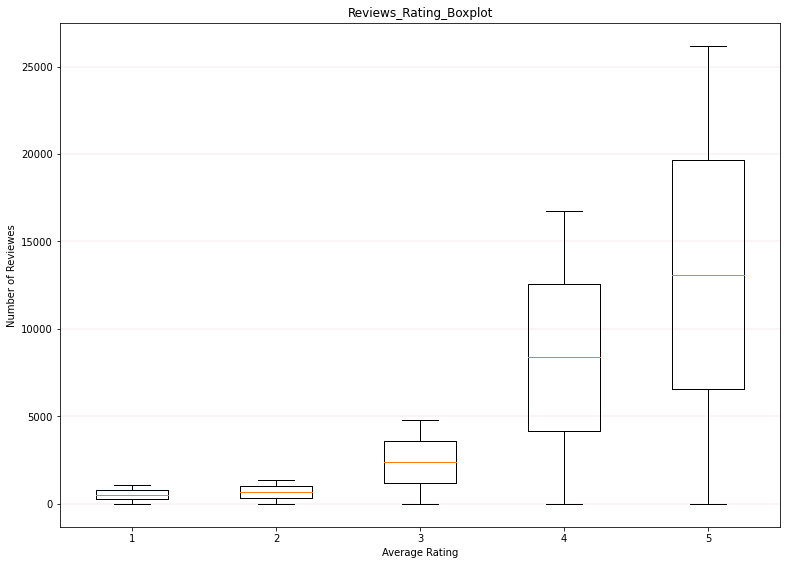

In [20]:
# Define the list of ratings

ratings = data["rating"].tolist()

#create datasets

data1 = np.arange(ratings.count(1))  
data2 = np.arange(ratings.count(2))  
data3 = np.arange(ratings.count(3))  
data4 = np.arange(ratings.count(4))
data5 = np.arange(ratings.count(5))

dataSet = [data1, data2, data3, data4,data5]  
  
figure = plt.figure(figsize =(10, 7))  
ax = figure.add_axes([0, 0, 1, 1]) 
ax.grid(color='indianred', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
bp = ax.boxplot(dataSet)

# Set the title and axis labels
plt.title('Reviews_Rating_Boxplot')
plt.xlabel('Average Rating')
plt.ylabel("Number of Reviewes")
plt.savefig('Reviews_Rating_Boxplot.png',dpi=1200)

plt.show()  

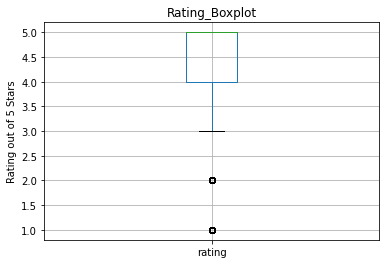

In [22]:
plt.title('Rating_Boxplot')
plt.ylabel("Rating out of 5 Stars")
data.boxplot(column = ["rating"],figsize =(10, 7))
plt.savefig('Hotel_Ratings.png',dpi=1200)

### Summary Statistics for Ratings

In [23]:
data["rating"].describe()

count    50175.000000
mean         4.307942
std          0.907367
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

#### Inference: The ratings are positively skewed. Thus in order to analyse the negative and postive aspects, the data should be seggregated accordingly.

### Reviewer Analysis

Analyzing the nationality of the reviewers to determine which countries the majority of guests come from. This can help hotel managers to tailor the marketing efforts to target those countries specifically.


In [38]:
data = pd.read_csv("Complete_Data_TripAdvisor.csv",encoding = 'unicode_escape')

In [39]:
data.head(3)

,Hotel,reviewer_name,country,clean countries,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews,topic_label
0,9Brick_Hotel,ChristelleNg,Singapore,Singapore,4.0,22-Dec,23-Jan,Love the look Location not too bad. Near the H...,0.184,0.092,0.724,0.654,Positive,48.0,-0.659063128,love look location bad station comfortable bed...,5
1,9Brick_Hotel,Molly123,NaN,NaN,1.0,22-Dec,22-Dec,Very bad experience I asked the hotel to provi...,0.154,0.156,0.690,-0.275,Neutral,51.0,-0.634014814,bad experience ask provide set comfort refuse ...,2
2,9Brick_Hotel,wamysdottir,Denmark,Danmark,4.0,19-Oct,20-Apr,Chic design A clean boutique hotel convenientl...,0.157,0.000,0.843,0.900,Positive,81.0,-0.38353167,chic design clean boutique conveniently locate...,5


In [40]:
nationality = data["clean countries"].value_counts()[:15]

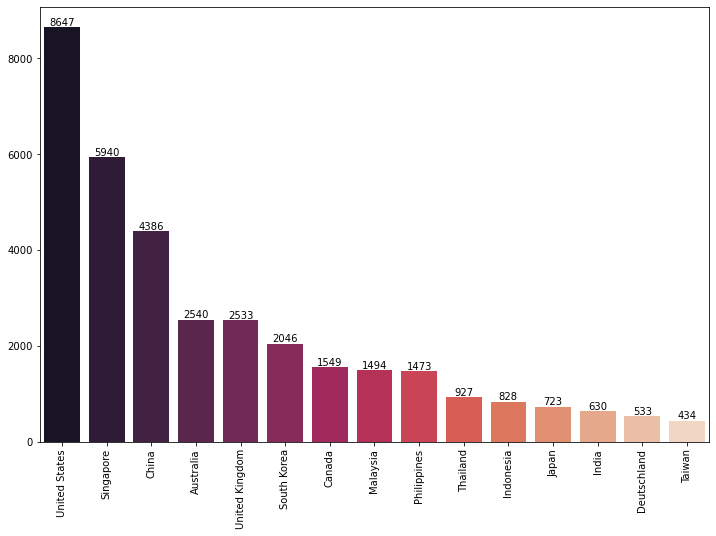

In [41]:
plt.figure(figsize=(12,8))
ax = sns.barplot(nationality.index, nationality.values, palette= "rocket")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.savefig('Reviewer_Analysis.png',dpi=1200)

#### Analysing the number of reviews and the average rating by nationality of the reviewer. 

This can help you identify whether there are any significant differences in the reviews based on the nationality of the reviewer.


In [42]:
# Group the data by nationality and calculate the number of reviews and average rating
result = data.groupby('clean countries').agg({'clean_reviews': 'count', 'rating': 'mean'}).sort_values("clean_reviews",ascending=False)

In [43]:
result = result.rename(columns={'clean_reviews': 'num_reviews', 'rating': 'avg_rating'}) 
result.head(10)

,num_reviews,avg_rating
clean countries,,
United States,8647,4.408003
Singapore,5940,4.239899
China,4386,4.158687
Australia,2540,4.308661
United Kingdom,2533,4.280695
South Korea,2046,4.238025
Canada,1549,4.330536
Malaysia,1494,4.271754
Philippines,1473,4.312967


In [44]:
result.to_excel("TripAdvisor_Analysis_countries.xlsx",sheet_name='EDA3')  

#### Analyzing the dates of the reviews to determine if there are any trends in terms of when guests are most likely to visit the hotel.

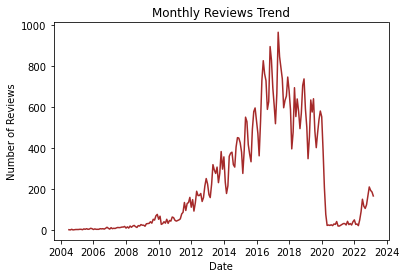

In [28]:
data = data[data["date_review_written"].str.contains("Yesterday")==False]

# Convert the date column to a pandas datetime format
data["date_review_written"] = pd.to_datetime(data["date_review_written"],errors = 'coerce')

# Group the data by month and calculate the average number of reviews per month
monthly_reviews = data.groupby(pd.Grouper(key='date_review_written', freq='M')).size().reset_index(name='count')

# Plot the trend of monthly reviews
plt.plot(monthly_reviews['date_review_written'], monthly_reviews['count'],color="brown")
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Monthly Reviews Trend')
plt.show()

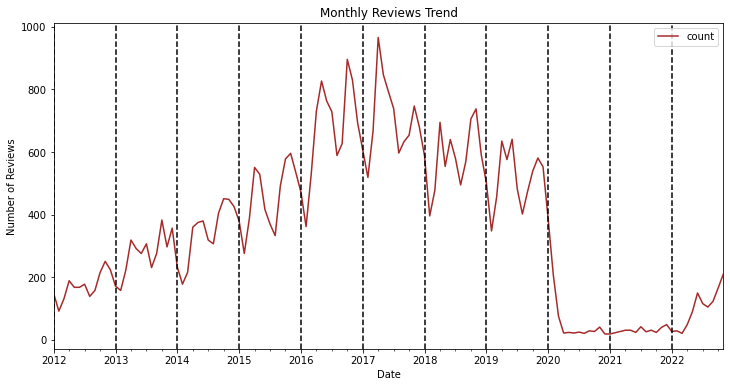

In [29]:
filtered_df = monthly_reviews.loc[(monthly_reviews['date_review_written'] >= '2012-01-31')
                     & (monthly_reviews['date_review_written'] < '2022-12-31')]


# Plot the trend of monthly reviews
ax = filtered_df.plot(x='date_review_written', y='count', figsize=(12,6), color="brown")
xcoords = ['2012-01-31','2013-01-31','2014-01-31','2015-01-31','2016-01-31','2017-01-31',
           '2018-01-31','2019-01-31','2020-01-31','2021-01-31','2022-01-31']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Monthly Reviews Trend')
plt.savefig('Monthly Reviews Trend.png',dpi=1200)
plt.show()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

filtered_df.set_index('date_review_written', inplace=True)

analysis = filtered_df[['count']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

<Figure size 1080x720 with 0 Axes>

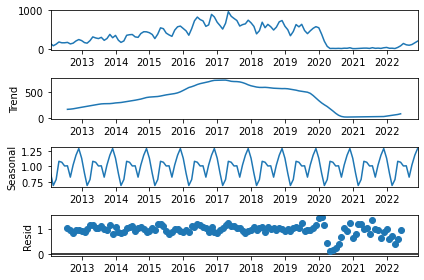

In [31]:
plt.figure(figsize=(15,10))
decompose_result_mult.plot()
plt.savefig('DecompositionReviewsTrend.png',dpi=1200)